In [2]:
#importing all the libraries required 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
#reading the Dataset
df = pd.read_csv('F:\machine learning and deep learning\datasets\seattle-crisis-data\crisis-data.csv')
df.head()

,Template ID,Reported Date,Reported Time,Occurred Date / Time,Call Type,Initial Call Type,Final Call Type,Disposition,Use of Force Indicator,Subject Veteran Indicator,...,Officer Race,Officer Year of Birth,Officer Years of Experience,CIT Certified Indicator,Officer Bureau Desc,Officer Precinct Desc,Officer Squad Desc,Precinct,Sector,Beat
0,43992,2015-05-15,22:56:00,2015-05-15T15:52:13.000,911,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - ALL OTHER,Geriatric Regional Assessment Team,N,No,...,Two or More Races,1988.0,0.0,NaN,PROFESSIONAL STANDARDS BUREAU,TRAINING AND EDUCATION SECTION,TRAINING - FIELD TRAINING SQUAD,NORTH,JOHN,J3
1,44008,2015-05-16,21:21:00,2015-05-16T19:47:12.000,"TELEPHONE OTHER, NOT 911",SUICIDE - IP/JO SUICIDAL PERSON AND ATTEMPTS,--CRISIS COMPLAINT - GENERAL,DMHP Referral,N,-,...,White,1985.0,1.0,NaN,OPERATIONS BUREAU,WEST PCT,WEST PCT 3RD W - K/Q RELIEF,WEST,MARY,M1
2,44102,2015-05-16,23:30:00,2015-01-03T08:28:11.000,"TELEPHONE OTHER, NOT 911",PARKING VIOLATION (EXCEPT ABANDONED CAR),--TRAFFIC - PARKING VIOL (EXCEPT ABANDONED CAR),Voluntary Committal,N,Unknown,...,White,1973.0,1.0,NaN,OPERATIONS BUREAU,WEST PCT,WEST PCT 3RD W - QUEEN,SOUTH,SAM,S2
3,44177,2015-05-17,20:07:00,2015-05-17T18:35:18.000,911,PERSON IN BEHAVIORAL/EMOTIONAL CRISIS,--CRISIS COMPLAINT - GENERAL,Mental Health Agency or Case Manager Notified,N,Unknown,...,Black or African American,1968.0,5.0,NaN,OPERATIONS BUREAU,SOUTHWEST PCT,SOUTHWEST PCT 2ND WATCH - F/W RELIEF,SOUTHWEST,WILLIAM,W3
4,44403,2015-05-17,12:34:00,2015-05-17T11:46:48.000,ONVIEW,PERSON IN BEHAVIORAL/EMOTIONAL CRISIS,--CRISIS COMPLAINT - GENERAL,Mobile Crisis Team,N,-,...,White,1980.0,NaN,NaN,OPERATIONS BUREAU,WEST PCT,WEST PCT 1ST W - DAVID/MARY,WEST,MARY,M2


In [4]:
df.shape

(49452, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49452 entries, 0 to 49451
Data columns (total 25 columns):
Template ID                    49452 non-null int64
Reported Date                  49452 non-null object
Reported Time                  49452 non-null object
Occurred Date / Time           48842 non-null object
Call Type                      48842 non-null object
Initial Call Type              48842 non-null object
Final Call Type                48842 non-null object
Disposition                    47836 non-null object
Use of Force Indicator         49452 non-null object
Subject Veteran Indicator      49452 non-null object
CIT Officer Requested          49452 non-null object
CIT Officer Dispatched         49452 non-null object
CIT Officer Arrived            49452 non-null object
Officer ID                     49452 non-null int64
Officer Gender                 49452 non-null object
Officer Race                   49452 non-null object
Officer Year of Birth          49322 non-null

In [6]:
#checking for columns with more than 45% null values
df[[col for col in df if df[col].count()/len(df)<.45]]

,CIT Certified Indicator
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


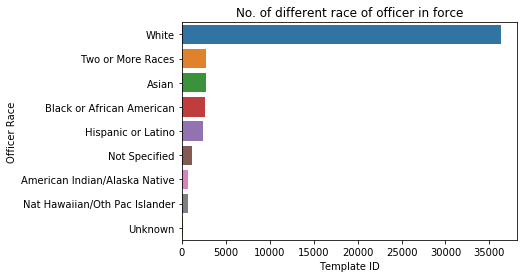

In [8]:
#=fig=plt.figure(figsize=(40,40))
sns.barplot(y='Officer Race',x='Template ID',data=df[['Officer Race','Template ID']].groupby('Officer Race',as_index=False).count().sort_values(by='Template ID',ascending=False))
#plt.xticks(rotation=90)
plt.title('No. of different race of officer in force');

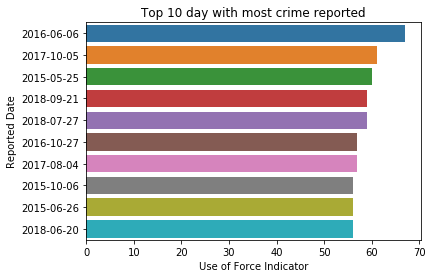

In [66]:
sns.barplot(y='Reported Date',x='Use of Force Indicator',data=df[['Reported Date','Use of Force Indicator']].groupby('Reported Date',as_index=False).count().sort_values(by='Use of Force Indicator',ascending=False).head(10))
plt.title('Top 10 day with most crime reported');